In [2]:
import numpy as np
print('numpy version\t:',np.__version__)
import pandas as pd
print('pandas version\t:',pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import os

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored


numpy version	: 1.17.2
pandas version	: 0.25.2
seaborn version	: 0.9.0


# 1. Data Cleaning

In [90]:
# Loading the data
filepath = 'lending-club-loan-data/loan.csv'
number_of_rows = 150000

loan = pd.read_csv(filepath,dtype='object',nrows=number_of_rows)

In [91]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0,Apr-2001,1,NaN,45,9,1,4341,10.3,34,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0,...,7,18,5,9,0,0,0,3,100,0,1,0,60124,16901,36500,18124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71,75,13,1,12315,24.2,44,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0,...,8,14,4,13,0,0,0,6,95,0,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1,13,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,Feb-2019,180.69,Mar-2019,Feb-2019,0,...,6,7,3,8,0,0,0,0,100,0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0,Feb-2006,0,NaN,NaN,10,0,5468,78.1,13,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,Feb-2019,146.51,Mar-2019,Feb-2019,0,...,2,3,2,10,0,0,0,3,100,100,0,0,385183,36151,5000,44984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0,Dec-2000,0,NaN,NaN,12,0,829,3.6,26,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,Feb-2019,731.78,Mar-2019,Feb-2019,0,...,6,15,2,12,0,0,0,5,92.3,0,0,0,157548,29674,930

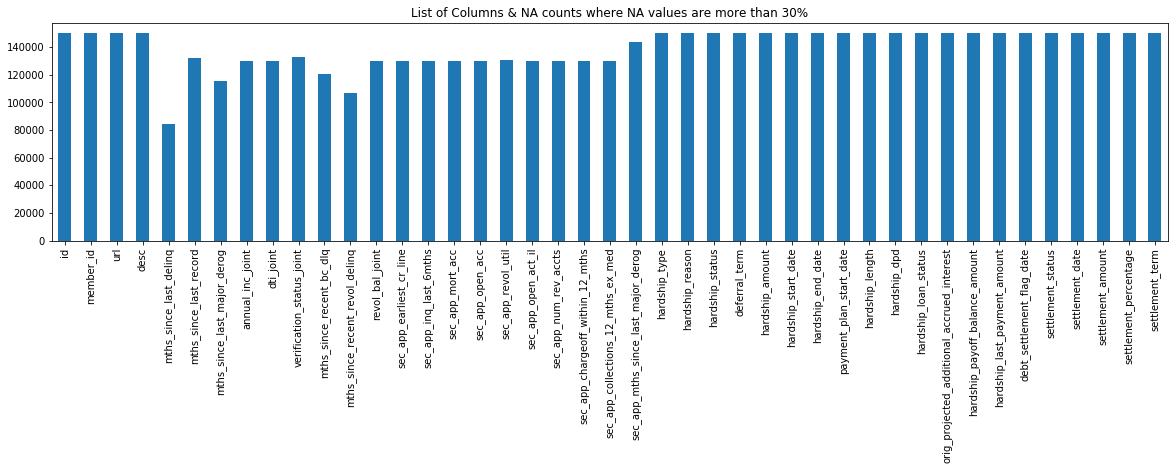

In [92]:
# columns that have over 30% of NaN values
NA_col = loan.isnull().sum()
NA_col = NA_col[NA_col.values >(0.3*len(loan))]

plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 30%')
plt.show()

In [93]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
                  '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

loan = removeNulls(loan, axis =1,percent = 0.3)
loan = removeNulls(loan, axis =0,percent = 0.3)

Number of Columns dropped	:  43

Old dataset rows,columns (150000, 145) 
New dataset rows,columns (150000, 102)

Number of Rows dropped	:  0

Old dataset rows,columns (150000, 102) 
New dataset rows,columns (150000, 102)


In [94]:
# drop comuns where the number of unique values equals = 1
# no value for analysis
def eliminate_single_unique_values(dataframe):
    df = dataframe.copy()
    unique = df.nunique()
    unique = unique[unique==1]
    df.drop(labels=list(unique.index), axis=1,inplace=True)
    print('Current dataframe shape is:',df.shape)
    return df
loan = eliminate_single_unique_values(loan)    

Current dataframe shape is: (150000, 95)


In [95]:
# dataset-related
loan.emp_length.fillna('0',inplace=True)

In [96]:
# dataset-related
not_required_columns = ["zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)

In [97]:
# dealiing with non-numeric values that are actually numeric
# .info attribute is used to access the type of data in every column
loan.info

numeric_columns = ['loan_amnt','funded_amnt',
                   'funded_amnt_inv','installment',
                   'int_rate','annual_inc','dti']

def convert_to_numeric(dataframe,columns_to_convert):
    dataframe[columns_to_convert] = dataframe[columns_to_convert].apply(pd.to_numeric)
    return dataframe

loan = convert_to_numeric(loan,numeric_columns)

In [98]:
# "other"_classifier
def other_classifier(dataframe,column,pct):
    """ This function changes values of a chosen categorical 
    column to 'other' if the count of such values is below a defined percentage (pct).
    dataframe - 
    column - column containing categorical values
    pct - threshold below which categorical values get reassigned to 'other', expressed in int.
    """
    
    df = dataframe.copy()
    category_break_down = (df[column].value_counts()*100)/len(df)
    categories_to_reassign = list(category_break_down[category_break_down < pct].index)
    df[column].replace(categories_to_reassign,'other', inplace=True)
    
    return df

In [99]:
#loan = other_classifier(loan,'purpose',pct=1)
loan.shape

(150000, 94)

In [100]:
# droping unnecessary observations with 
loan_status = (loan.loan_status.value_counts()*100)/len(loan)
loan = loan[(loan.loan_status == 'Current') | (loan.loan_status == 'Fully Paid')]

In [101]:
loan.shape

(148385, 94)

# 2. Derived Metrics

In [102]:
# loan['loan_income_ratio'].mean() = inf

loan['loan_income_ratio'] = loan['loan_amnt'] / loan['annual_inc']
loan['loan_income_ratio'].quantile([0.25,0.75,0.95])

pd.to_numeric(loan['loan_income_ratio'])
loan['loan_income_ratio']

0        0.0455
1        0.3333
2        0.0843
3        0.0435
4        0.5240
          ...  
149993   0.1633
149994   0.1698
149996   0.3359
149998   0.1154
149999   0.4167
Name: loan_income_ratio, Length: 148385, dtype: float64

In [103]:
# splitting issue_date column
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].tail()

,issue_d,issue_month,issue_year
149993,Sep-2018,Sep,2018
149994,Sep-2018,Sep,2018
149996,Sep-2018,Sep,2018
149998,Sep-2018,Sep,2018
149999,Sep-2018,Sep,2018


In [104]:
# ordering data by month 
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

In [108]:
# categorizing income
bins = [0, 25000, 50000, 75000, 100000,1000000]
slots = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slots)

In [127]:
loan[['int_rate']].describe()
#loan[['int_rate']].quantile([0.85])

,int_rate
count,148385.0000
mean,12.8696
std,5.1061
min,6.0000
25%,8.4600
50%,11.8000
75%,16.1400
max,30.9900


In [129]:
# catgorizing intereste rates
bins = [6, 8.5, 11, 13.5, 16, 18, 31]
slots = ['6-8.5', '8.5-11', '11-13.5', '13.5-16', '16-18', '18 and above']

loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slots)

In [137]:
loan['int_rate_range'].value_counts()/len(loan)

6-8.5          0.2725
11-13.5        0.1693
13.5-16        0.1543
18 and above   0.1478
8.5-11         0.1366
16-18          0.1195
Name: int_rate_range, dtype: float64

# Univariate Analysis

In [142]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    # set the style for the plots
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        #
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

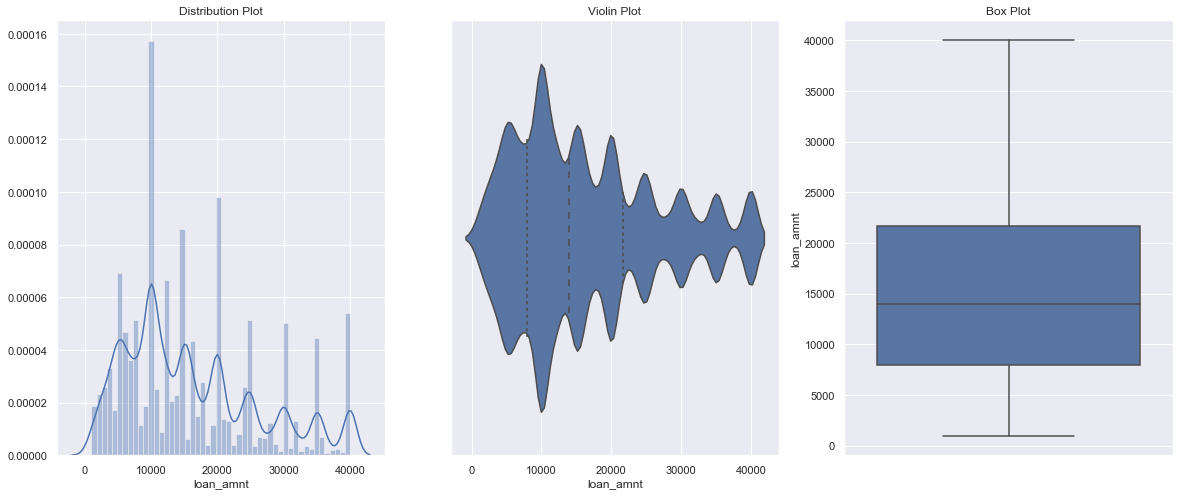

In [143]:
univariate(df=loan,col='loan_amnt',vartype=0)

In [144]:
loan[['loan_amnt']].describe()

,loan_amnt
count,148385.0000
mean,16011.7726
std,10134.6149
min,1000.0000
25%,8000.0000
50%,14000.0000
75%,21675.0000
max,40000.0000


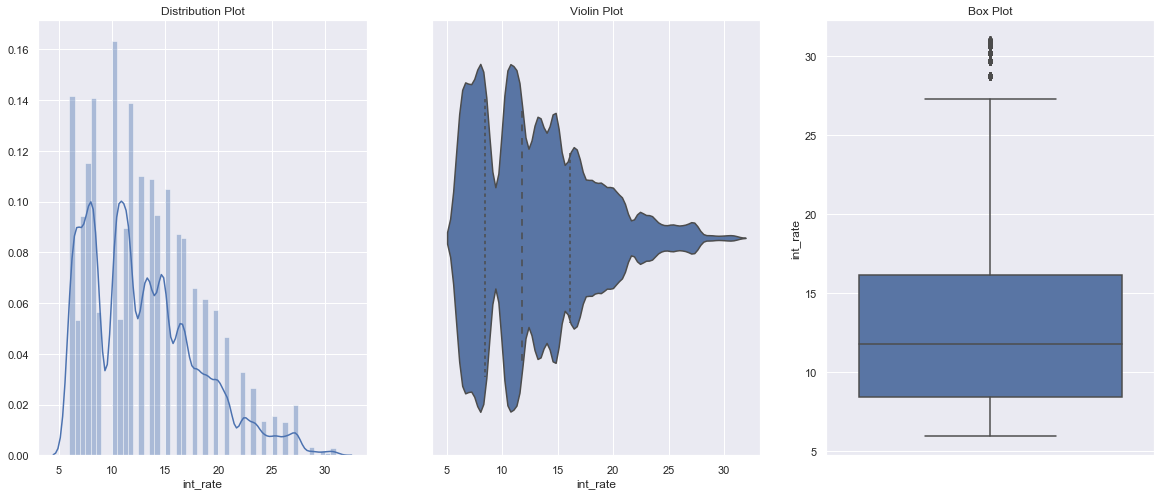

In [145]:
univariate(df=loan,col='int_rate',vartype=0)